In [41]:
import numpy as np
import pandas as pd                                  # for data wrangling and analysis
import mglearn

import sklearn as sk                                 # for machine learning
from sklearn.model_selection import train_test_split # split data into 75% training & 25% test sets
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colormaps
# list(colormaps)

**1. Classification & Regression problems**

Dataset dimension: (26, 3)


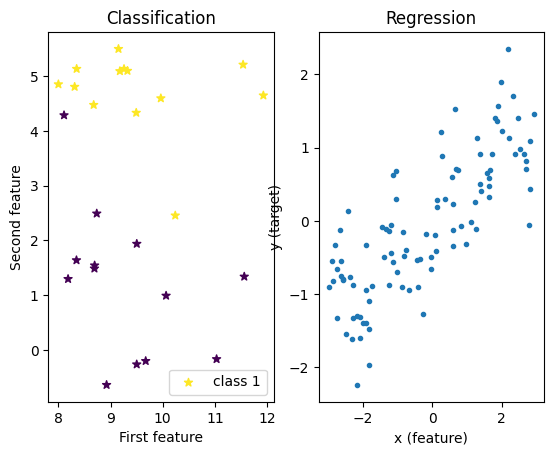

In [57]:
# Forge dataset

X1, y1 = mglearn.datasets.make_forge()

df1 = pd.DataFrame(X1, columns= ['x1', 'x2'])
df1 = df1.assign(y = y1)
print("Dataset dimension: {}".format(df1.shape)) # 2 features and 26 obs

plt.subplot(1, 2, 1)
plt.scatter(df1['x1'], df1['x2'], c=df1['y'], marker= '*')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('Classification')
plt.legend(['class 1', 'class 0'], loc="lower right")

# Wave dataset

X2, y2 = mglearn.datasets.make_wave()
df2 = pd.DataFrame(X2, columns=['X'])
df2 = df2.assign(y = y2)

plt.subplot(1, 2, 2)
plt.scatter(df2['X'], df2['y'], marker = '.')
plt.xlabel('x (feature)')
plt.ylabel('y (target)')
plt.title('Regression')

plt.show()

**2. Wisconsin Breast Cancer dataset**